1. 먼저 iris 데이터셋을 활용하여 iris 데이터의 차원(특징) 개수를 확인 후 PCA를 통해 차원 개수를 축소하고 이 데이터를 통해 비지도학습 실습을 진행해보겠습니다.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names
data.shape
#target_names

(150, 4)

본 과정을 통해 iris 데이터는 150개의 데이터를 가진 4차원 데이터임을 알 수 있습니다. 다음으로는 PCA를 통해 2개의 주성분으로 변환하는 과정을 진행하고 실제 칼럼을 확인해보겠습니다.

In [17]:
pca = PCA(n_components=2) # 2개의 주성분으로 변환
data_pca = pca.fit_transform(data)
data_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

본 과정을 통해 나온 data_pca 는 컬럼 이름은 없는 상황. 각 컬럼에 이름을 만들어주고, 이전에 미리 만들어둔 target을 통해 target 컬럼까지 만들어주겠습니다.차원축소가 일어났다 해도 정답값은 변하지 않습니다. 정답값은 PCA대상이 아님. PCA는 입력특징만 변환 !

In [18]:
pca_df = pd.DataFrame(data_pca, columns=['PCA1','PCA2'])
pca_df['target'] = target
pca_df.head(10)

,PCA1,PCA2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
5,-2.280860,0.741330,0
6,-2.820538,-0.089461,0
7,-2.626145,0.163385,0
8,-2.886383,-0.578312,0
9,-2.672756,-0.113774,0


다음으로는 iris 데이터를 시각화해보겠습니다. 제1주성분을 x축, 제2주성분을 y축으로 갖는 그래프 위에 그릴 예정입니다.

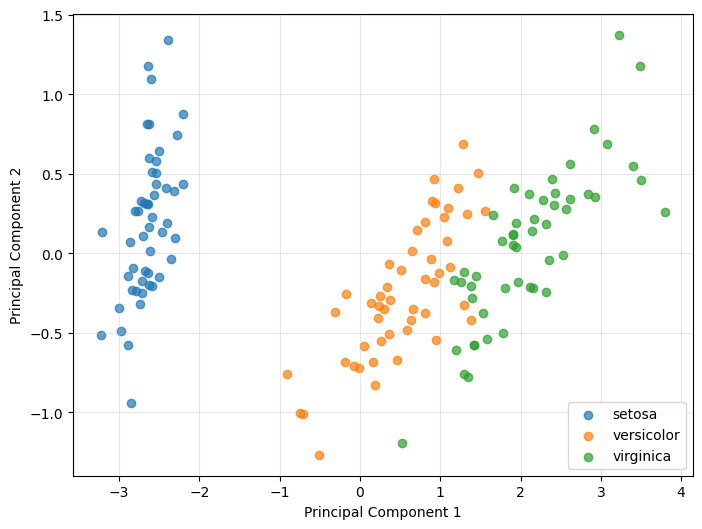

In [19]:
plt.figure(figsize=(8, 6))

for i, target_name in enumerate(target_names):
  subset = pca_df[pca_df['target'] == i]
  plt.scatter(subset['PCA1'], subset['PCA2'], label=target_name, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

2. Kmeans

먼저 data라는 dataframe을 만들고 여기에 iris데이터를 집어넣겠습니다.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Kmeans를 돌리기 전 최적의 k 를 구해야 합니다.이를 위해 첫번째 방법인 Elbow method 를 사용해보겠습니다.

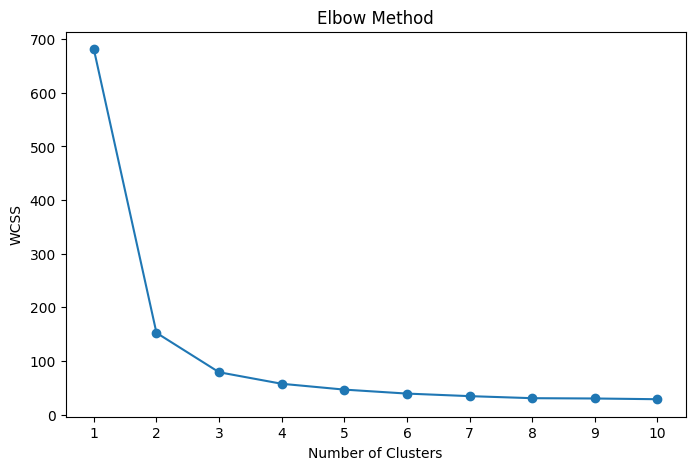

In [23]:
max_k = 10
wcss = []
for k in range(1, max_k+1):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,max_k+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_k+1))
plt.show()

최적의 k를 구하기위한 두번째 방법인 실루엣 기법을 적용시켜보겠습니다.

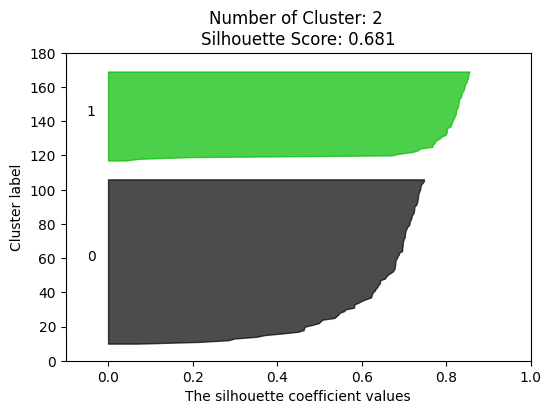

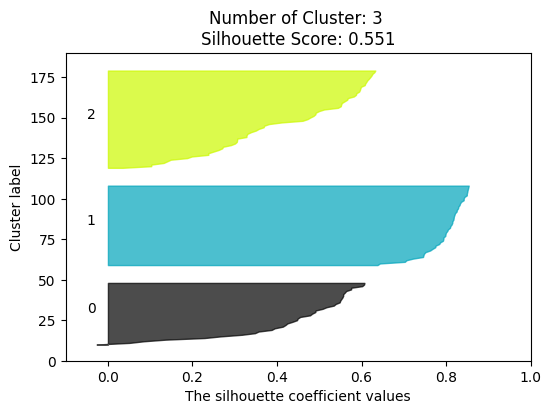

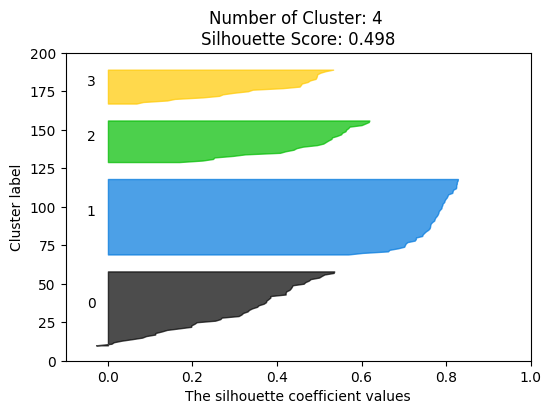

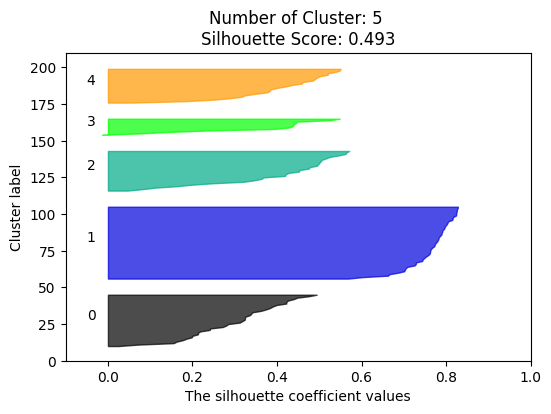

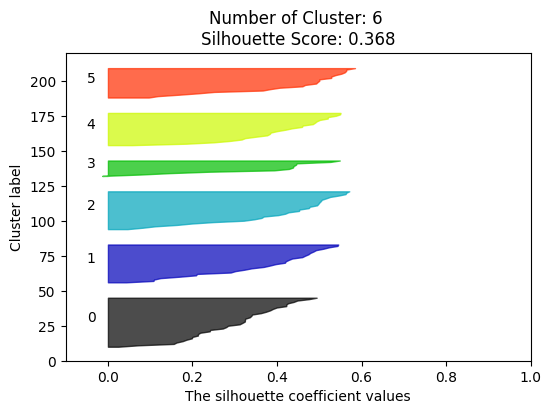

In [26]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score


cluster_range = [2,3,4,5,6]
for n_clusters in cluster_range:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = kmeans.fit_predict(data)

  silhouette_avg = silhouette_score(data, cluster_labels)
  sample_silhouette_values = silhouette_samples(data, cluster_labels)

  fig, ax = plt.subplots(figsize=(6,4))
  y_lower = 10

  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

  ax.set_title(f"Number of Cluster: {n_clusters} \nSilhouette Score: {silhouette_avg:.3f}")
  ax.set_xlabel("The silhouette coefficient values")
  ax.set_ylabel("Cluster label")
  ax.set_xlim([-0.1, 1])
  ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])
  plt.show()

실루엣, 엘보우 기법을 사용하여 나온 K(2 혹은 3)을 넣어서 kmeans 진행해보겠습니다.

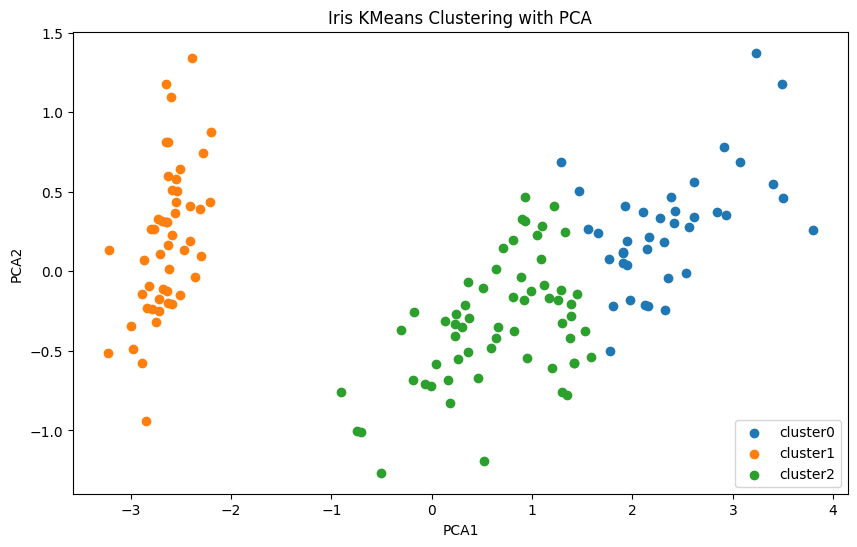

In [27]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data.iloc[:,:-1])

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.iloc[:,:-2])

data['pca_x'] = data_pca[:,0]
data['pca_y'] = data_pca[:,1]

plt.figure(figsize=(10,6))
for cluster in range(3):
  clustered_data = data[data['cluster'] == cluster]
  plt.scatter(clustered_data['pca_x'], clustered_data['pca_y'], label=f'cluster{cluster}')

plt.title('Iris KMeans Clustering with PCA')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()